In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [31]:
digits = load_digits()

In [32]:
# in this dataset features and target are predefined so we do need to define it

print('image data-feature shape', digits.data.shape)
print('label data-target shape', digits.target.shape)

image data-feature shape (1797, 64)
label data-target shape (1797,)


In [33]:
digits.data
#each row in these represents an image and each val. of image row represents pixels i.e 64 pixels total in a row

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
#brief overview of our dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

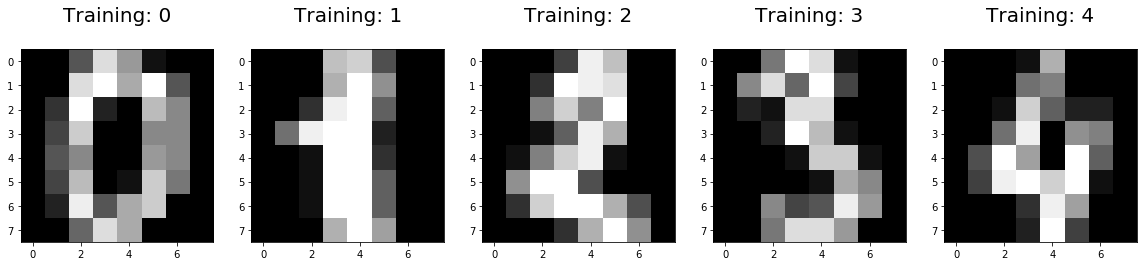

In [35]:
plt.figure(figsize = (20,4)) #this creates plot of height=20, width=4




for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):

#zip func. gives o/p as tuple of images and its label -> (img1,label1) (img2,label2) .....(img5,label5)
#enumerate func. attaches indexing to each value of above -> (0,(img1,label1)), (1,(img2,label2))......(4,(img5,label5))
# index= 0,1,2,3,4  (image,label)=(img1,label1) (img2,label2) .....(img5,label5)

    plt.subplot(1,5,index+1) #make subplot with row=1 and 5 col,we are plotting many images in one figure so using subplots
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray) #here image is stored in form of 1d array of 64 elem so reshaping it to 8*8 matrix for printing it and choosing grey color map
    plt.title('Training: %i\n' %label,fontsize = 20)

### step2 - splitting our dataset for training and testing

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)



In [46]:
#outof 1797 its 25% used as testing i.e 450 and remaining 1347 used for training
print(x_train.shape)
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


### Step3- Selecting model i.e Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
#this code passes the training data and create a fit of data, and giving a threshhold to probability

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#   x_test[0].reshape(1,-1) ->  for testing purpose we are passing 1st image but it is stored as a 1d array so we reshape it as (1,-1)
print(logreg.predict(x_test[0].reshape(1,-1)))

#passing 1st 10 images and predict its label
logreg.predict(x_test[0:10])



[2]


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [66]:
y_pred = logreg.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 9, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

### Step4- predicting the accuracy using accuracy technique(by calc. confusion matrix)

In [70]:
#using score()
score = logreg.score(x_test,y_test)
print(score)

#using accuracy_score()
print(metrics.accuracy_score(y_test,y_pred))

0.9511111111111111
0.9511111111111111


In [71]:
#printing the confusion matrix, for this diagonal entries should be as large for better accuracy
print(metrics.confusion_matrix(y_test,y_pred))

#diag elem. indicates actual val. same as predicted val

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1, 'Accuracy score:0.9511111111111111')

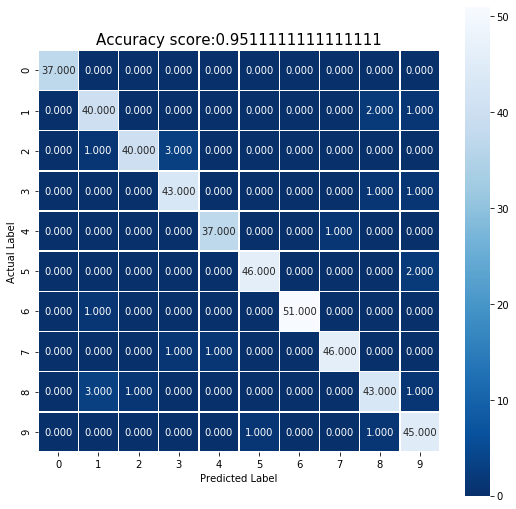

In [78]:
#using heatmap to o/p confusion matrix

conf_m = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(conf_m, annot=True, fmt='.3f', linewidths = 0.5 , square = True , cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

sample_tit = 'Accuracy score:{}'.format(score)
plt.title(sample_tit,size = 15)

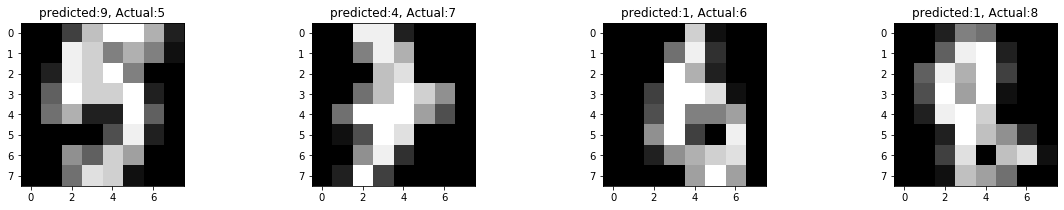

In [83]:
index = 0
misclassified_index = []

#step1 - creating a misclassified index
for predict,actual in zip(y_pred,y_test):
    if predict != actual:
        misclassified_index.append(index)        
        
    index = index + 1 
    # misclassified_index = [56, 94, 118, 124, 130, 169, 181, 196, 213, 235, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]    

#step2 - plotting misclassified data    
plt.figure(figsize=(20,3))

for plotindex,label in enumerate(misclassified_index[0:4]):
    plt.subplot(1,4,plotindex+1)
    plt.imshow(np.reshape(x_test[label],(8,8)), cmap = plt.cm.gray)
    
    plt.title("predicted:{}, Actual:{}".format(y_pred[label],y_test[label],fontsize = 50))